In [1]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
# 3. Разделите данные на выборку для обучения и тестирования
# 4. Постройте модель LDA
# 5. Визуализируйте предсказания для тестовой выборки и центры классов
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['sort'] = iris.target

In [6]:
# Приведем название колонок к более удобному виду

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sort']

In [7]:
### Дискриминантный анализ

In [8]:
# Оставляем только два признака и целевую переменную

sm_data = data[['sepal_length', 'sepal_width', 'sort']]


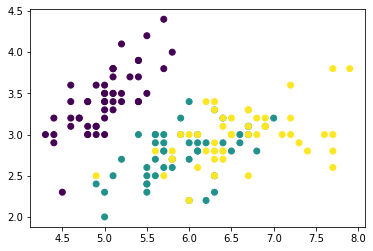

In [9]:
# Визуализируем распределение

plt.scatter(sm_data['sepal_length'], sm_data['sepal_width'],  c=data['sort'])
plt.show()

# Визуально по имеющимся признакам можно отделить только один кластер

In [10]:
# Разделим данные на тренировочные и тестовые

data_train, data_test = train_test_split(data, test_size=0.2)

In [11]:
# Выделим независимую переменную

y_train, y_test = data_train['sort'], data_test['sort']
del data_train['sort']
del data_test['sort']

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
# Обучаем модель

lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
# Делаем предсказание

y_pred = lda.predict(data_test)

In [15]:
# Сравним результаты
result = pd.DataFrame([y_test.values, y_pred]).T

In [16]:
accuracy_score(y_test, lda.predict(data_test))

# Модель отработала очень хорошо

0.9666666666666667

In [17]:
lda.means_

array([[4.98421053, 3.41578947, 1.44473684, 0.24473684],
       [5.95813953, 2.78837209, 4.30465116, 1.3372093 ],
       [6.61538462, 2.96666667, 5.57948718, 2.01282051]])

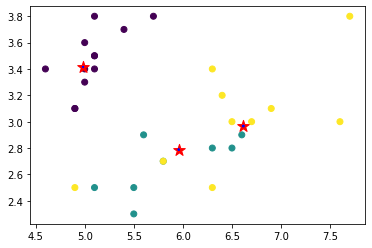

In [18]:
# Визуализируем разделение на кластеры и кластерные центры

plt.scatter(data_test['sepal_length'], data_test['sepal_width'], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1],  c='r', s=150, marker='*') # почему все равно показывает 3 центра?
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], lda.means_[:, 2],  c='b', marker='*') # при указании 3 колонок не получается передать параметр размера

plt.show()

In [19]:
###K-means

In [20]:
data_sepal = data[['sepal_length', 'sepal_width']]

In [21]:
# Определяем количество кластеров

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_sepal)
    k_inertia.append(clf_kmeans.inertia_)

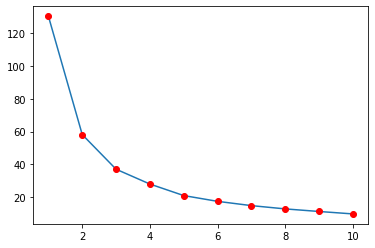

In [22]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

# Визуализация не помогает точно определить количество кластеров.
# Наиболее подходящее количество - 2 или 3

In [23]:
# Делим на 2 кластера

kmeans = KMeans(n_clusters=2)
clusters_2 = kmeans.fit_predict(data_sepal)
clusters_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

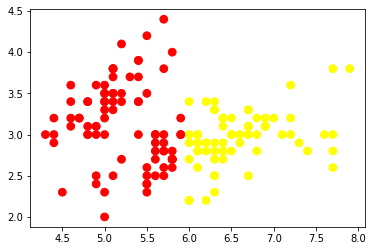

In [24]:
plt.scatter(data_sepal['sepal_length'], data_sepal['sepal_width'],cmap='autumn', c=clusters_2, s=60)
plt.show()

In [25]:
# Делим на 3 кластера

kmeans = KMeans(n_clusters=3)
clusters_3 = kmeans.fit_predict(data_sepal)
clusters_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

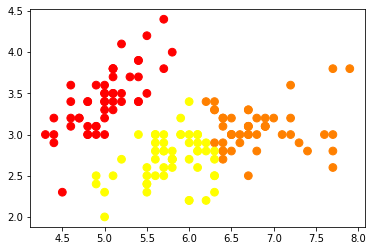

In [26]:
plt.scatter(data_sepal['sepal_length'], data_sepal['sepal_width'],cmap='autumn', c=clusters_3, s=60)
plt.show()

# Самое оптимальное - 3 кластера, такое деление позволяет точно отделить верхний кластер от 2 нижних.
# Для правильного разделения двух нижних кластеров не хватает признаков,
# поэтому увеличение количества кластером не даст результата

Выводы:
Для датасета iris при использовании всего двух признаков лучший результат показал дисриминантный анализ.
Это связано с характером распределения значений - нижние кластеры перекрывают друг друга, что создает проблему для метода к-средних.
Т.к. нам заранее известно количество категорий - это сорта растений, то и использование дискриминантного анализа является предпочтительным.




